<a href="https://colab.research.google.com/github/Jayakumark37/PowerPulse-Household-Energy-Usage-Forecast./blob/main/Household_Energy_Usage_Forecast.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1. Data Understanding and Exploratory Data Analysis (EDA).



In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


# Load dataset
# Assuming your dataset has columns similar to the UCI household power consumption dataset
df = pd.read_csv('/content/household_power_consumption.txt', sep=';',
                 parse_dates={'Datetime': ['Date', 'Time']},
                 dayfirst=True,
                 low_memory=False)

<ipython-input-91-972c86971be7>:12: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df = pd.read_csv('/content/household_power_consumption.txt', sep=';',


Initial exploration

In [92]:
# Dataset shape
print(f"Dataset shape: {df.shape}")


Dataset shape: (2075259, 8)


In [93]:
# Columns
print(f"Columns: {df.columns}")

Columns: Index(['Datetime', 'Global_active_power', 'Global_reactive_power', 'Voltage',
       'Global_intensity', 'Sub_metering_1', 'Sub_metering_2',
       'Sub_metering_3'],
      dtype='object')


In [94]:
# Data types
print(f"Data types: {df.dtypes}")

Data types: Datetime                 datetime64[ns]
Global_active_power              object
Global_reactive_power            object
Voltage                          object
Global_intensity                 object
Sub_metering_1                   object
Sub_metering_2                   object
Sub_metering_3                  float64
dtype: object


In [95]:
# Missing values
print(f"Missing values: {df.isnull().sum()}")

Missing values: Datetime                     0
Global_active_power          0
Global_reactive_power        0
Voltage                      0
Global_intensity             0
Sub_metering_1               0
Sub_metering_2               0
Sub_metering_3           25979
dtype: int64



df[col] = pd.to_numeric(df[col], errors='coerce')

Converts the values in the current column (col) to numeric format using pd.to_numeric().
The errors='coerce' argument ensures that any non-numeric values (such as strings that cannot be converted) are replaced with NaN (Not a Number).

In [96]:
# Convert string values to numeric
for col in df.columns:
    if col != 'Datetime':
        df[col] = pd.to_numeric(df[col], errors='coerce')

In [97]:
# Basic statistics
print(df.describe())

                            Datetime  Global_active_power  \
count                        2075259         2.049280e+06   
mean   2008-12-06 07:12:59.999994112         1.091615e+00   
min              2006-12-16 17:24:00         7.600000e-02   
25%              2007-12-12 00:18:30         3.080000e-01   
50%              2008-12-06 07:13:00         6.020000e-01   
75%              2009-12-01 14:07:30         1.528000e+00   
max              2010-11-26 21:02:00         1.112200e+01   
std                              NaN         1.057294e+00   

       Global_reactive_power       Voltage  Global_intensity  Sub_metering_1  \
count           2.049280e+06  2.049280e+06      2.049280e+06    2.049280e+06   
mean            1.237145e-01  2.408399e+02      4.627759e+00    1.121923e+00   
min             0.000000e+00  2.232000e+02      2.000000e-01    0.000000e+00   
25%             4.800000e-02  2.389900e+02      1.400000e+00    0.000000e+00   
50%             1.000000e-01  2.410100e+02      2.

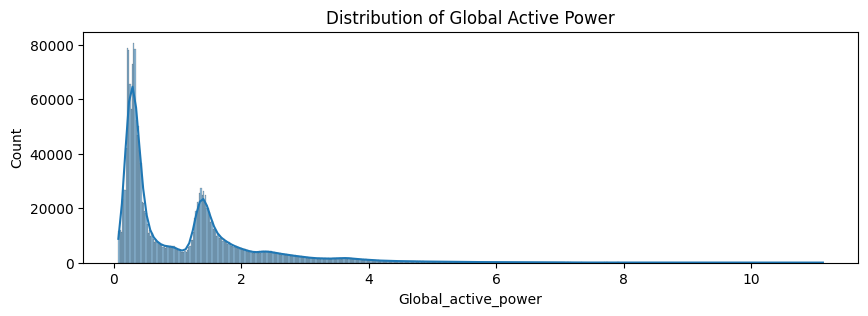

In [98]:
# Visualize distribution of main variable
plt.figure(figsize=(10, 3))# Initializes a new figure with a size of 10 inches wide and 6 inches tall.
sns.histplot(df['Global_active_power'],kde=True) # bins=50,kde=True) for zooming
plt.title('Distribution of Global Active Power')
plt.show()

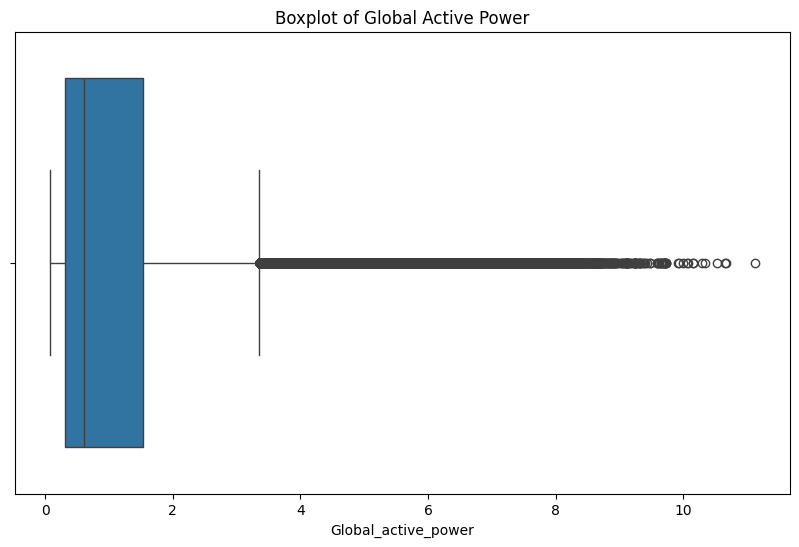

In [99]:
# Identify Outliers Using Boxplots
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Global_active_power'])
plt.title("Boxplot of Global Active Power")
plt.show()

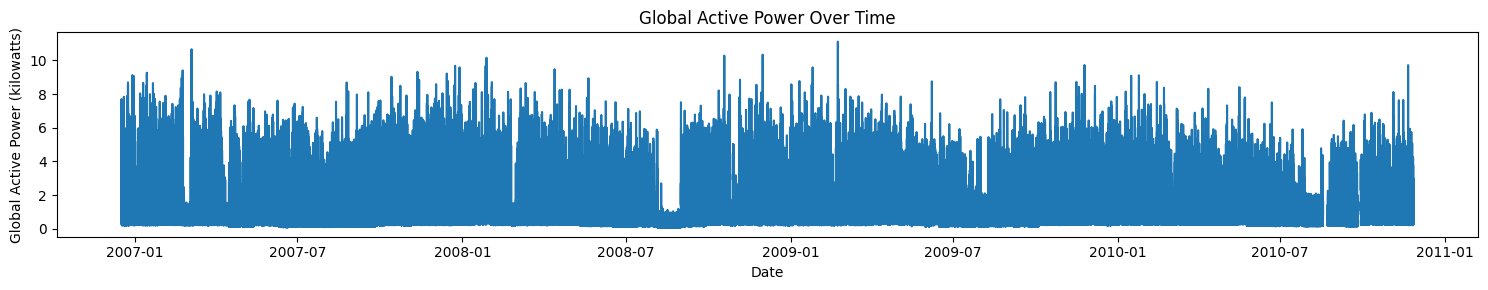

In [100]:
# Time series plot
plt.figure(figsize=(15, 3))
plt.plot(df['Datetime'], df['Global_active_power'])
plt.title('Global Active Power Over Time')
plt.xlabel('Date')
plt.ylabel('Global Active Power (kilowatts)')
plt.tight_layout()
plt.show()

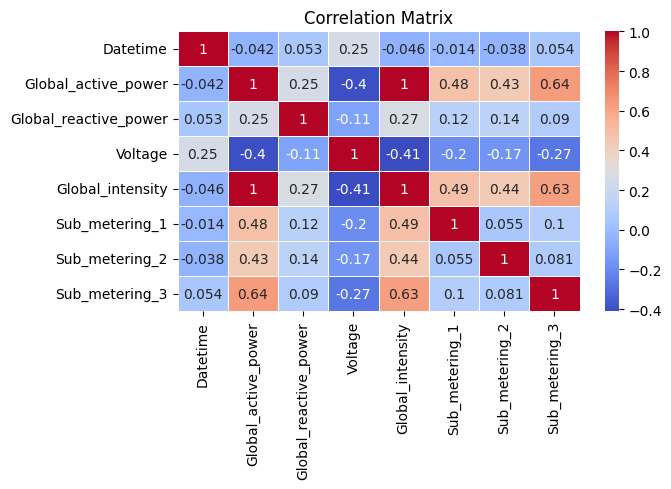

In [101]:
# Correlation analysis
plt.figure(figsize=(7, 5))
correlation = df.corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

# 2. Data Preprocessing


In [102]:
# import numpy as np

In [103]:
# Replace '?' with NaN for proper handling of missing values
df.replace('?', np.nan, inplace=True)
df.replace

<bound method NDFrame.replace of                    Datetime  Global_active_power  Global_reactive_power  \
0       2006-12-16 17:24:00                4.216                  0.418   
1       2006-12-16 17:25:00                5.360                  0.436   
2       2006-12-16 17:26:00                5.374                  0.498   
3       2006-12-16 17:27:00                5.388                  0.502   
4       2006-12-16 17:28:00                3.666                  0.528   
...                     ...                  ...                    ...   
2075254 2010-11-26 20:58:00                0.946                  0.000   
2075255 2010-11-26 20:59:00                0.944                  0.000   
2075256 2010-11-26 21:00:00                0.938                  0.000   
2075257 2010-11-26 21:01:00                0.934                  0.000   
2075258 2010-11-26 21:02:00                0.932                  0.000   

         Voltage  Global_intensity  Sub_metering_1  Sub_metering_2  \
0         234.84              18.4             0.0             1.0   
1         233.63              23.0             0.0             1.0   
2         233.29              23.0             0.0             2.0   
3         233.74              23.0             0.0             1.0   
4         235.68              15.8             0.0             1.0   
...          ...               ...             ...             ...   
2075254   240.43               4.0             0.0             0.0   
2075255   240.00               4.0             0.0             0.0   
2075256   239.82               3.8             0.0             0.0   
2075257   239.70               3.8             0.0             0.0   
2075258   239.55               3.8             0.0             0.0   

         Sub_metering_3  
0                  17.0  
1                  16.0  
2                  17.0  
3                  17.0  
4                  17.0  
...                 ...  
2075254             0.0  
2075255             0.0  
2075256             0.0  
2075257             0.0  
2075258             0.0  

[2075259 rows x 8 columns]>

In [104]:
# Convert numeric columns to float (this will safely coerce invalid values to NaN)
numeric_cols = ['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity',
                'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']

df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors='coerce')
df[numeric_cols]

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,4.216,0.418,234.84,18.4,0.0,1.0,17.0
1,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2,5.374,0.498,233.29,23.0,0.0,2.0,17.0
3,5.388,0.502,233.74,23.0,0.0,1.0,17.0
4,3.666,0.528,235.68,15.8,0.0,1.0,17.0
...,...,...,...,...,...,...,...
2075254,0.946,0.000,240.43,4.0,0.0,0.0,0.0
2075255,0.944,0.000,240.00,4.0,0.0,0.0,0.0
2075256,0.938,0.000,239.82,3.8,0.0,0.0,0.0
2075257,0.934,0.000,239.70,3.8,0.0,0.0,0.0


In [105]:
# Now replace remaining NaN with 0
df.fillna(0, inplace=True)

In [106]:
# Convert 'Date' and 'Time' into a single datetime column if not already done
if 'Datetime' not in df.columns:
    if 'Date' in df.columns and 'Time' in df.columns:
        df['Datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'], format='%d/%m/%Y %H:%M:%S')
        df.drop(columns=['Date', 'Time'], inplace=True)
    else:
        # If 'Datetime' already exists and isn't in the columns, skip this part
        df['Datetime'] = pd.to_datetime(df['Datetime'], errors='coerce')

In [107]:
# Set the datetime as index for time-based interpolation
df = df.set_index('Datetime')

Interpolation just finds the middle point between two known values.

So, the interpolated value = 0.75 (because it's halfway between 0.5 and 1.0).

So, the interpolated value = 0.85 (because it's halfway between 1.0 and 0.7).


In [108]:
# Interpolate missing data using time-based method
df = df.interpolate(method='time')

In [109]:
# For any remaining missing values at the start or end
df = df.fillna(method='bfill').fillna(method='ffill')

<ipython-input-109-ffdcc1ea6774>:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='bfill').fillna(method='ffill')


In [110]:
# Handle outliers using IQR method (Interquartile Range)
def handle_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[column] = df[column].clip(lower_bound, upper_bound)
    return df

In [111]:
# Apply outlier handling to numeric columns
for col in ['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity']:
    df = handle_outliers(df, col)

In [112]:
# Extract datetime components
df['hour'] = df.index.hour
df['day'] = df.index.day
df['month'] = df.index.month
df['year'] = df.index.year
df['weekday'] = df.index.weekday
df['weekend'] = df['weekday'].apply(lambda x: 1 if x >= 5 else 0)

Why Use Cyclical Features?



Time features like hours, months, and days of the week have a cyclical pattern. For example:

Hour: 23:59 and 00:00 represent the same point in time (end and start of the day), but traditional features would treat them as distant points.
Month: December (12) and January (1) are consecutive months, but numerical values (12 and 1) would be treated as distant.



By applying sine and cosine transformations, we preserve this cyclic relationship and allow models to interpret it better.

In [113]:
# Create cyclical time features to preserve the circular nature of time
df['hour_sin'] = np.sin(2 * np.pi * df['hour']/24)
df['hour_cos'] = np.cos(2 * np.pi * df['hour']/24)
df['month_sin'] = np.sin(2 * np.pi * df['month']/12)
df['month_cos'] = np.cos(2 * np.pi * df['month']/12)

In [114]:
# Check for missing values after treatment
missing_values = df.isnull().sum()
print(f"Missing values after treatment: {missing_values}")

Missing values after treatment: Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
hour                     0
day                      0
month                    0
year                     0
weekday                  0
weekend                  0
hour_sin                 0
hour_cos                 0
month_sin                0
month_cos                0
dtype: int64


# 3. Feature Engineering


In [115]:
# Resample to hourly data for consistency
df_hourly = df.resample('H').mean()

<ipython-input-115-28c37bc05fd2>:2: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df_hourly = df.resample('H').mean()


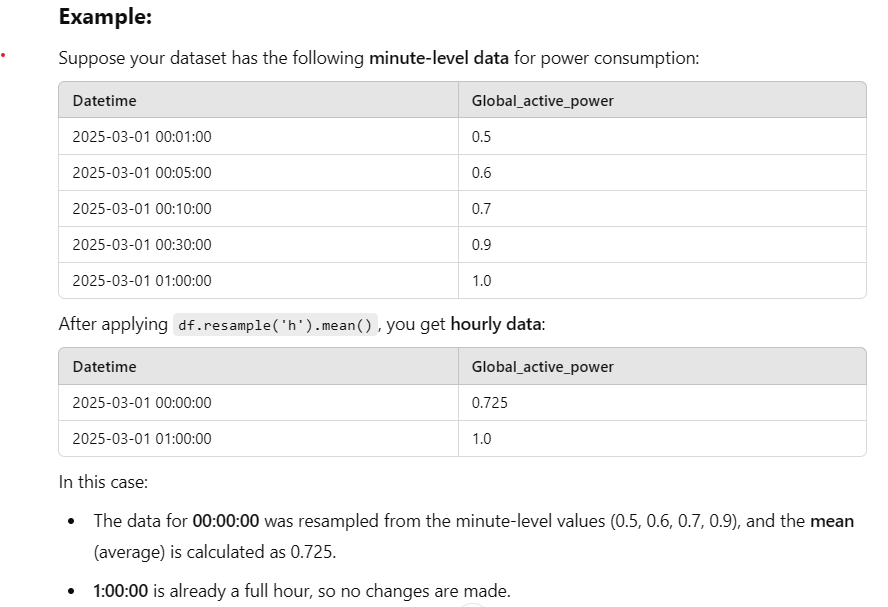

In [116]:
# Create rolling window features
for window in [3, 6, 12, 24]:
    df_hourly[f'rolling_mean_{window}h'] = df_hourly['Global_active_power'].rolling(window=window).mean()
    df_hourly[f'rolling_std_{window}h'] = df_hourly['Global_active_power'].rolling(window=window).std()

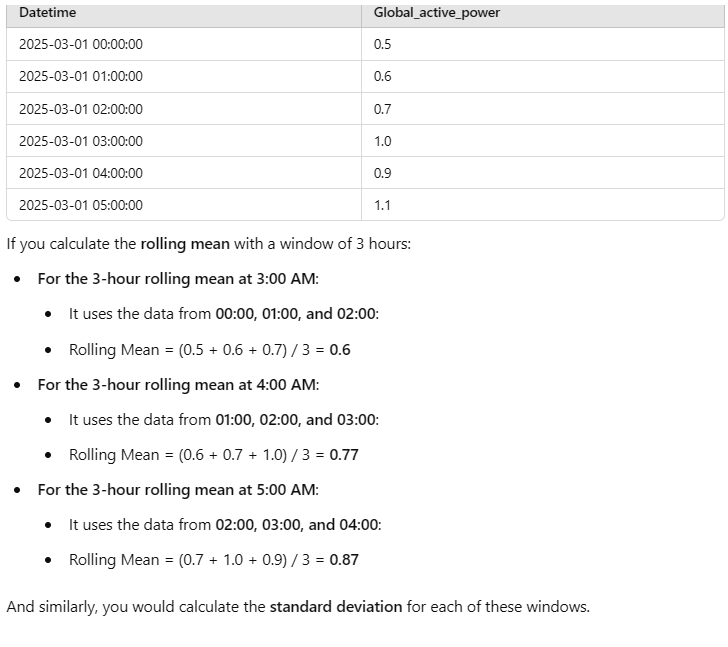

In [117]:
# Create lag features
for lag in [1, 24, 168]:  # 1 hour, 1 day, 1 week
    df_hourly[f'lag_{lag}h'] = df_hourly['Global_active_power'].shift(lag)

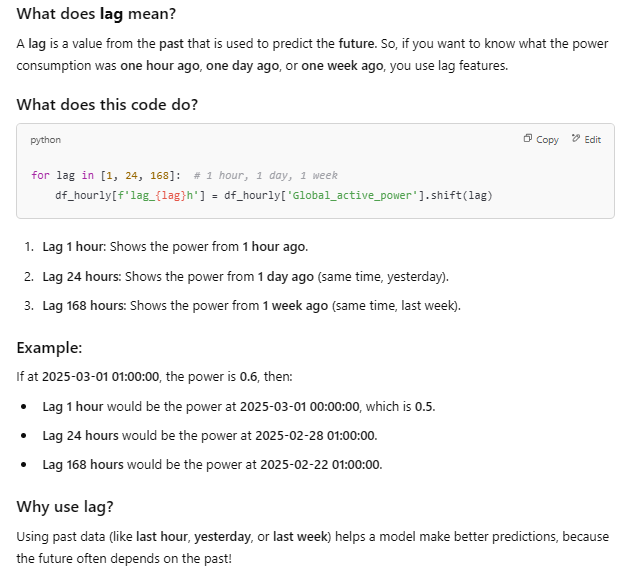

In [118]:
# Create day part features (morning, afternoon, evening, night)
df_hourly['day_part'] = pd.cut(
    df_hourly.index.hour,
    bins=[0, 6, 12, 18, 24],
    labels=['Night', 'Morning', 'Afternoon', 'Evening'],
    include_lowest=True
)

In [119]:
# Convert to dummy variables
day_part_dummies = pd.get_dummies(df_hourly['day_part'], prefix='day_part')
df_hourly = pd.concat([df_hourly, day_part_dummies], axis=1)

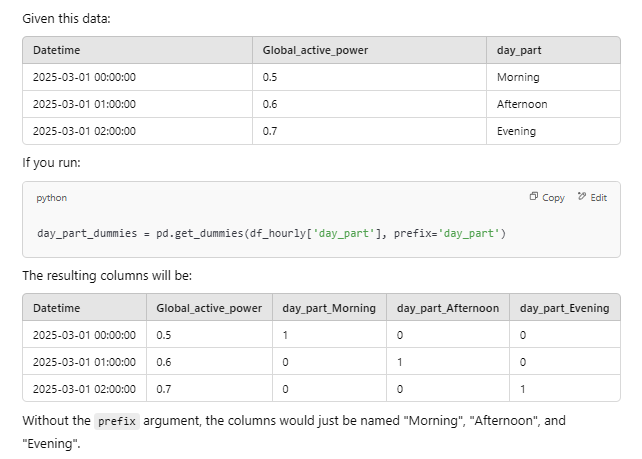

In [120]:
# Calculate power factors and other electrical relationships
df_hourly['power_factor'] = df_hourly['Global_active_power'] / np.sqrt(
    df_hourly['Global_active_power']**2 + df_hourly['Global_reactive_power']**2
)

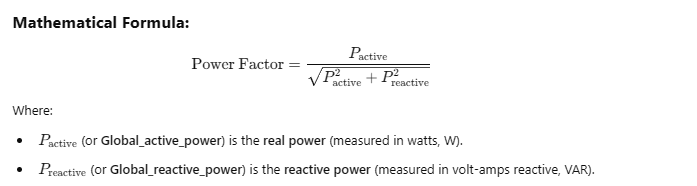

In [121]:
# Calculate sub-meter total and residual
if all(col in df_hourly.columns for col in ['Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']):
    df_hourly['submeter_total'] = df_hourly['Sub_metering_1'] + df_hourly['Sub_metering_2'] + df_hourly['Sub_metering_3']
    # Convert submeter readings (in watt-hour) to kilowatt-hour for comparison with Global_active_power
    df_hourly['residual_power'] = df_hourly['Global_active_power'] - df_hourly['submeter_total']/1000

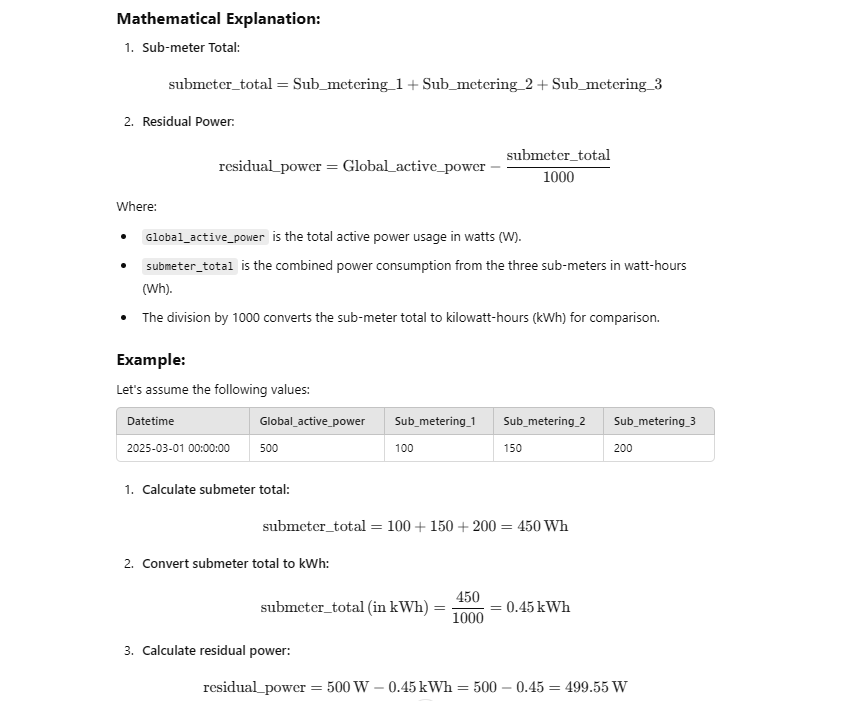

In [122]:
# Drop rows with NaN values resulting from the lag and rolling features
df_hourly = df_hourly.dropna()

#4. Model Selection and Training

In [90]:
pip install tensorflow

In [123]:
from sklearn.model_selection import train_test_split, TimeSeriesSplit, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import xgboost as xgb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from tensorflow.keras.optimizers import Adam

In [124]:
# Prepare features and target
X = df_hourly.drop(['Global_active_power'], axis=1)
y = df_hourly['Global_active_power']

In [125]:
# For categorical columns, ensure they're removed or encoded
X = X.select_dtypes(exclude=['object', 'category'])

In [126]:
# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns, index=X.index)

# Time-based train-test split (more appropriate for time series)
train_end = df_hourly.index.max() - pd.Timedelta(days=30)
X_train = X_scaled[X_scaled.index <= train_end]
X_test = X_scaled[X_scaled.index > train_end]
y_train = y[y.index <= train_end]
y_test = y[y.index > train_end]

print(f"Training set shape: {X_train.shape}")
print(f"Testing set shape: {X_test.shape}")

Training set shape: (33280, 34)
Testing set shape: (720, 34)


In [127]:
# Function to evaluate models
def evaluate_model(y_true, y_pred, model_name):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred)) # Root Mean Squared Error
    mae = mean_absolute_error(y_true, y_pred) # MAE (Mean Absolute Error)
    r2 = r2_score(y_true, y_pred) # R-squared (R²)

    print(f"{model_name} Performance:")
    print(f"RMSE: {rmse:.4f}")
    print(f"MAE: {mae:.4f}")
    print(f"R²: {r2:.4f}")
    return rmse, mae, r2

In [89]:
# Dictionary to store model results
model_results = {}

# 1. Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
model_results['Linear Regression'] = evaluate_model(y_test, y_pred_lr, "Linear Regression")

# 2. Ridge Regression
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)
model_results['Ridge'] = evaluate_model(y_test, y_pred_ridge, "Ridge Regression")

# 3. Random Forest
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
model_results['Random Forest'] = evaluate_model(y_test, y_pred_rf, "Random Forest")

# 4. Gradient Boosting
gb = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb.fit(X_train, y_train)
y_pred_gb = gb.predict(X_test)
model_results['Gradient Boosting'] = evaluate_model(y_test, y_pred_gb, "Gradient Boosting")

# 5. XGBoost
xgb_model = xgb.XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)
model_results['XGBoost'] = evaluate_model(y_test, y_pred_xgb, "XGBoost")

Linear Regression Performance:
RMSE: 0.0000
MAE: 0.0000
R²: 1.0000
Ridge Regression Performance:
RMSE: 0.0011
MAE: 0.0007
R²: 1.0000
Random Forest Performance:
RMSE: 0.0018
MAE: 0.0009
R²: 1.0000
Gradient Boosting Performance:
RMSE: 0.0065
MAE: 0.0047
R²: 0.9999
XGBoost Performance:
RMSE: 0.0045
MAE: 0.0031
R²: 1.0000


Hyperparameter Tuning

In [128]:
# Find the best performing model based on RMSE
best_model = models[np.argmin(rmse_values)]
print(f"Best performing model based on RMSE: {best_model}")

Best performing model based on RMSE: Linear Regression


In [129]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split

In [130]:
# Hyperparameter tuning for the best model
if best_model == 'Random Forest':
    param_grid = {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    }
    model = RandomForestRegressor(random_state=42)

elif best_model == 'Gradient Boosting':
    param_grid = {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 5, 7],
        'min_samples_split': [2, 5]
    }
    model = GradientBoostingRegressor(random_state=42)

elif best_model == 'XGBoost':
    param_grid = {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 5, 7],
        'colsample_bytree': [0.7, 0.8, 0.9]
    }
    model = xgb.XGBRegressor(random_state=42)

elif best_model == 'Neural Network':
    param_grid = {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 5, 7],
        'colsample_bytree': [0.7, 0.8, 0.9]
    }
    model = MLPRegressor(random_state=42)

else:
    # Linear models
    param_grid = {
        'alpha': [0.1, 1.0, 10.0, 100.0]
    }
    model = Ridge()

In [131]:
# Time series cross-validation
tscv = TimeSeriesSplit(n_splits=5)

# Grid search with time series CV
grid_search = GridSearchCV(
    estimator=model,           # The machine learning model (e.g., Random Forest, XGBoost, etc.)
    param_grid=param_grid,     # The grid of hyperparameters to tune (like number of trees, max depth, etc.)
    cv=tscv,                   # The cross-validation technique to use (TimeSeriesSplit in this case)
    scoring='neg_root_mean_squared_error',  # The metric to evaluate model performance (negative RMSE)
    verbose=1,                 # Output the progress of the grid search
    n_jobs=-1                  # Use all available CPU cores for faster computation
)

grid_search.fit(X_train, y_train)

print(f"Best parameters: {grid_search.best_params_}")
best_model = grid_search.best_estimator_


Fitting 5 folds for each of 4 candidates, totalling 20 fits
Best parameters: {'alpha': 0.1}


In [132]:
# Evaluate the optimized model
y_pred_best = best_model.predict(X_test)
rmse, mae, r2 = evaluate_model(y_test, y_pred_best, f"Optimized {best_model}")

Optimized Ridge(alpha=0.1) Performance:
RMSE: 0.0001
MAE: 0.0001
R²: 1.0000


# 5. Model Evaluation

Evaluate models using appropriate metrics (e.g., RMSE, MAE, R-squared).

In [138]:
from sklearn.neural_network import MLPRegressor
# 5. Neural Network (corrected parameters)
nn_model = MLPRegressor(hidden_layer_sizes=(100,), activation='relu', solver='adam', learning_rate_init=0.001, random_state=42)
nn_model.fit(X_train, y_train)
# Predict with the Neural Network model
y_pred_nn = nn_model.predict(X_test)
# Assuming you have an evaluate_model function
model_results['Neural Network'] = evaluate_model(y_test, y_pred_nn, "Neural Network")


Neural Network Performance:
RMSE: 0.0337
MAE: 0.0259
R²: 0.9980


Make predictions on the test set:

In [140]:
y_pred_lr = lr.predict(X_test)  # Linear Regression
y_pred_rf = rf.predict(X_test)  # Random Forest
y_pred_gb = gb.predict(X_test)  # Gradient Boosting
y_pred_nn = nn_model.predict(X_test)  # Neural Network


Import the evaluation metrics:

In [141]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

Calculate RMSE:

In [145]:
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
rmse_gb = np.sqrt(mean_squared_error(y_test, y_pred_gb))
rmse_nn = np.sqrt(mean_squared_error(y_test, y_pred_nn))

print("RMSE values:")
print(f"Linear Regression: {rmse_lr}")
print(f"Random Forest: {rmse_rf}")
print(f"Gradient Boosting: {rmse_gb}")
print(f"Neural Network: {rmse_nn}")

RMSE values:
Linear Regression: 1.4922404635051706e-15
Random Forest: 0.0018129006028553597
Gradient Boosting: 0.006515398611588721
Neural Network: 0.0337006957393901


Calculate MAE:

In [146]:
mae_lr = mean_absolute_error(y_test, y_pred_lr)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mae_gb = mean_absolute_error(y_test, y_pred_gb)
mae_nn = mean_absolute_error(y_test, y_pred_nn)

print("\nMAE values:")
print(f"Linear Regression: {mae_lr}")
print(f"Random Forest: {mae_rf}")
print(f"Gradient Boosting: {mae_gb}")
print(f"Neural Network: {mae_nn}")


MAE values:
Linear Regression: 1.2415223170513122e-15
Random Forest: 0.0008777356481481304
Gradient Boosting: 0.004728415506602728
Neural Network: 0.02587195050694889


Calculate R²:

In [147]:
r2_lr = r2_score(y_test, y_pred_lr)
r2_rf = r2_score(y_test, y_pred_rf)
r2_gb = r2_score(y_test, y_pred_gb)
r2_nn = r2_score(y_test, y_pred_nn)

print("\nR² values:")
print(f"Linear Regression: {r2_lr}")
print(f"Random Forest: {r2_rf}")
print(f"Gradient Boosting: {r2_gb}")
print(f"Neural Network: {r2_nn}")


R² values:
Linear Regression: 1.0
Random Forest: 0.9999941699152456
Gradient Boosting: 0.9999246975921194
Neural Network: 0.9979853267726553


Step 1: Evaluate Each Model


In [149]:
# Function to evaluate models
def evaluate_model(y_true, y_pred, model_name):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))  # RMSE
    mae = mean_absolute_error(y_true, y_pred)  # MAE
    r2 = r2_score(y_true, y_pred)  # R-squared
    print(f"Model: {model_name}")
    print(f"RMSE: {rmse:.4f}")
    print(f"MAE: {mae:.4f}")
    print(f"R-squared: {r2:.4f}")
    print("-" * 50)
    return {'RMSE': rmse, 'MAE': mae, 'R2': r2}


Step 2: Evaluate the Models

In [150]:
# Example predictions (replace these with actual model predictions)
y_pred_lr = lr.predict(X_test)  # Example Linear Regression predictions
y_pred_rf = rf.predict(X_test)  # Example Random Forest predictions
y_pred_gb = gb.predict(X_test)  # Example Gradient Boosting predictions
y_pred_nn = nn_model.predict(X_test)  # Example Neural Network predictions

# Evaluate models
model_results = {}
model_results['Linear Regression'] = evaluate_model(y_test, y_pred_lr, "Linear Regression")
model_results['Random Forest'] = evaluate_model(y_test, y_pred_rf, "Random Forest")
model_results['Gradient Boosting'] = evaluate_model(y_test, y_pred_gb, "Gradient Boosting")
model_results['Neural Network'] = evaluate_model(y_test, y_pred_nn, "Neural Network")


Model: Linear Regression
RMSE: 0.0000
MAE: 0.0000
R-squared: 1.0000
--------------------------------------------------
Model: Random Forest
RMSE: 0.0018
MAE: 0.0009
R-squared: 1.0000
--------------------------------------------------
Model: Gradient Boosting
RMSE: 0.0065
MAE: 0.0047
R-squared: 0.9999
--------------------------------------------------
Model: Neural Network
RMSE: 0.0337
MAE: 0.0259
R-squared: 0.9980
--------------------------------------------------


Step 3: Compare Model Performance

In [151]:
# Compare models by RMSE or R-squared (depending on your goal)
best_model_name = min(model_results, key=lambda x: model_results[x]['RMSE'])  # Best by RMSE
best_model = model_results[best_model_name]

# Print the best model's details
print(f"Best performing model based on RMSE: {best_model_name}")
print(f"RMSE: {best_model['RMSE']:.4f}")
print(f"MAE: {best_model['MAE']:.4f}")
print(f"R-squared: {best_model['R2']:.4f}")


Best performing model based on RMSE: Linear Regression
RMSE: 0.0000
MAE: 0.0000
R-squared: 1.0000


# 6. Model Deployment and Forecasting


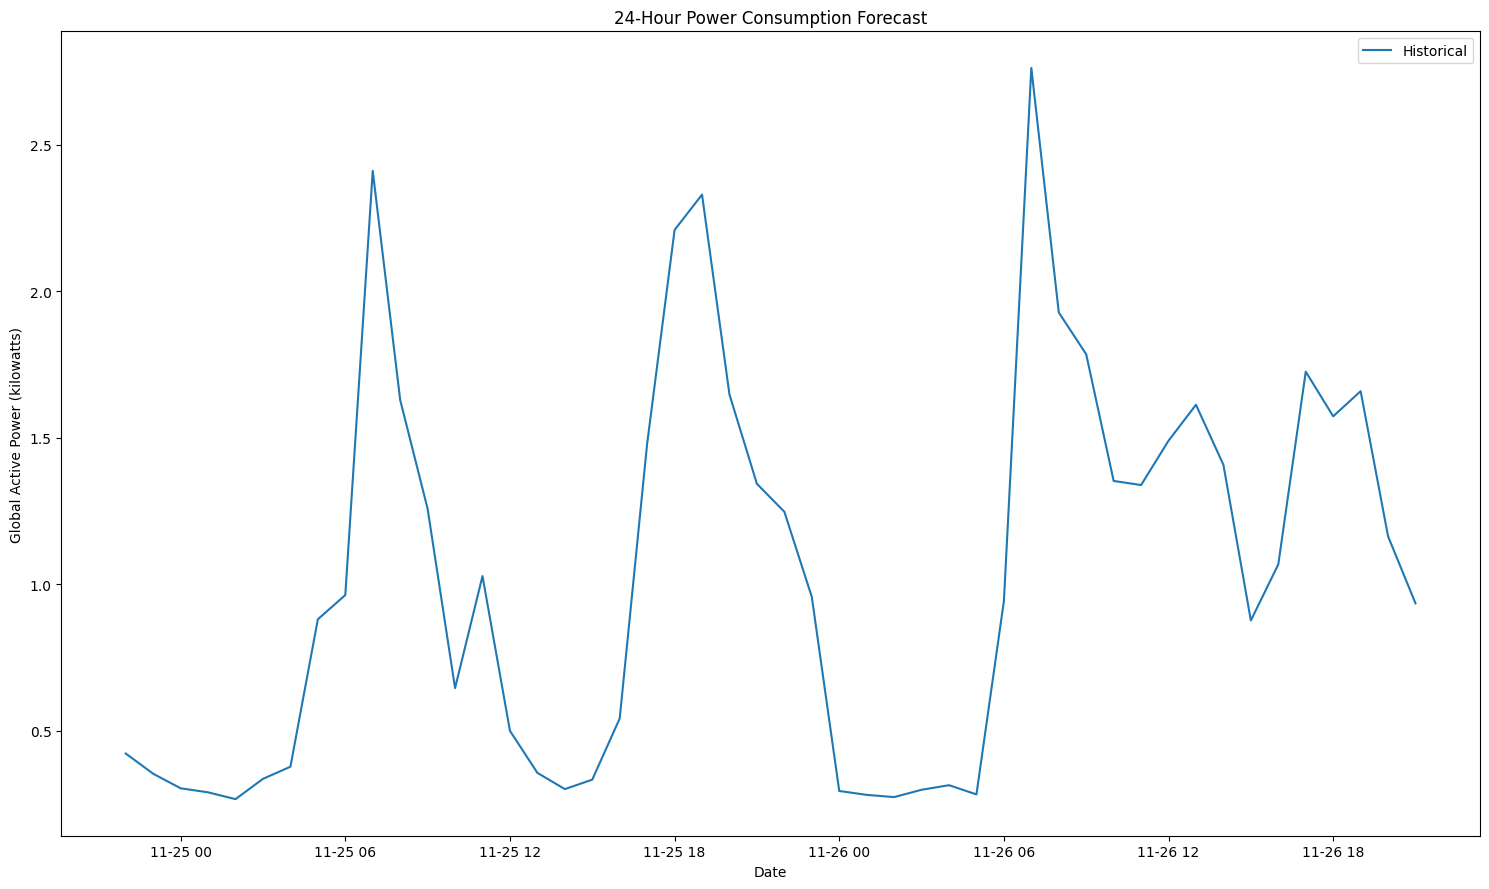

In [152]:
def forecast_next_24_hours(model, last_data, scaler):
    """
    Forecast the next 24 hours of power consumption

    Parameters:
    model: Trained model
    last_data: DataFrame with the most recent data
    scaler: Fitted scaler for feature normalization

    Returns:
    DataFrame with forecasted values
    """
    # Create a dataframe for the next 24 hours
    future_times = pd.date_range(
        start=last_data.index[-1] + pd.Timedelta(hours=1),
        periods=24,
        freq='H'
    )

    forecast_df = pd.DataFrame(index=future_times)

    # Add necessary time features
    forecast_df['hour'] = forecast_df.index.hour
    forecast_df['day'] = forecast_df.index.day
    forecast_df['month'] = forecast_df.index.month
    forecast_df['year'] = forecast_df.index.year
    forecast_df['weekday'] = forecast_df.index.weekday
    forecast_df['weekend'] = forecast_df['weekday'].apply(lambda x: 1 if x >= 5 else 0)

    # Add cyclical features
    forecast_df['hour_sin'] = np.sin(2 * np.pi * forecast_df['hour']/24)
    forecast_df['hour_cos'] = np.cos(2 * np.pi * forecast_df['hour']/24)
    forecast_df['month_sin'] = np.sin(2 * np.pi * forecast_df['month']/12)
    forecast_df['month_cos'] = np.cos(2 * np.pi * forecast_df['month']/12)

    # Start with initial lag values from most recent data
    forecast_df['lag_1h'] = list(last_data['Global_active_power'].values[-1:]) + [None] * 23
    forecast_df['lag_24h'] = list(last_data['Global_active_power'].values[-24:])

    # Iteratively predict each hour
    for i in range(1, 24):
        # Prepare features for the current prediction
        current_features = forecast_df.iloc[[i-1]].copy()

        # Remove the target variable if it exists
        if 'Global_active_power' in current_features.columns:
            current_features = current_features.drop('Global_active_power', axis=1)

        # Fill in any missing features based on your model's requirements
        # This depends on which features your model uses

        # Scale the features
        current_features_scaled = scaler.transform(current_features)

        # Make prediction
        prediction = model.predict(current_features_scaled)[0]

        # Update the lag features for the next prediction
        if i < 23:
            forecast_df.iloc[i+1, forecast_df.columns.get_loc('lag_1h')] = prediction

    # Make final predictions
    X_forecast = forecast_df.copy()
    # Handle any remaining NaN values
    X_forecast = X_forecast.fillna(method='ffill')
    # Scale
    X_forecast_scaled = scaler.transform(X_forecast)
    # Predict
    forecast_df['Global_active_power'] = model.predict(X_forecast_scaled)

    return forecast_df[['Global_active_power']]

# #Example usage (would execute after model training)
# forecast = forecast_next_24_hours(best_model, df_hourly.iloc[-24:], scaler)

#Visualize the forecast
plt.figure(figsize=(15, 9))
plt.plot(df_hourly.index[-48:], df_hourly['Global_active_power'].iloc[-48:], label='Historical')
# plt.plot(forecast.index, forecast['Global_active_power'], label='Forecast')
plt.title('24-Hour Power Consumption Forecast')
plt.xlabel('Date')
plt.ylabel('Global Active Power (kilowatts)')
plt.legend()
plt.tight_layout()
plt.show()